In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product
import matplotlib.pyplot as plt

In [2]:
# load dataset 2

In [3]:
df = pd.read_csv('2_distribution_applicant_sex_and_action_taken.csv', low_memory=False)

# 3 ethnicity and race distribution

## All the race and ethnicity columns

applicant_ethnicity_1                     
applicant_ethnicity_2                     
applicant_ethnicity_3                     
applicant_ethnicity_4                     
applicant_ethnicity_5                                         
applicant_ethnicity_observed   

co_applicant_ethnicity_1 
co_applicant_ethnicity_3                  
co_applicant_ethnicity_4                  
co_applicant_ethnicity_5 
co_applicant_ethnicity_observed   

applicant_race_1                          
applicant_race_2                         
applicant_race_3                       
applicant_race_4                         
applicant_race_5    
applicant_race_observed  

co_applicant_race_1                      
co_applicant_race_2                      
co_applicant_race_3                      
co_applicant_race_4                 
co_applicant_race_5          
co_applicant_race_observed    

derived_ethnicity                         
derived_race

## Columns we use for the model
'applicant_ethnicity_1',
'co_applicant_ethnicity_1',
'applicant_race_1',
'applicant_race_2',
'co_applicant_race_1',
'co_applicant_race_2',

In [4]:
columns_of_interest = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1', 'applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

info_df = df[columns_of_interest]
print(info_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184502 entries, 0 to 184501
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   applicant_ethnicity_1     183744 non-null  float64
 1   co_applicant_ethnicity_1  184221 non-null  float64
 2   applicant_race_1          184247 non-null  float64
 3   applicant_race_2          11483 non-null   float64
 4   co_applicant_race_1       184408 non-null  float64
 5   co_applicant_race_2       5736 non-null    float64
dtypes: float64(6)
memory usage: 8.4 MB
None


## Remove columns we dont need.

In [5]:
# List of columns to remove
columns_to_remove = ['applicant_ethnicity_2', 'applicant_ethnicity_3', 'applicant_ethnicity_4', 
                     'applicant_ethnicity_5', 'applicant_ethnicity_observed','co_applicant_ethnicity_2', 'co_applicant_ethnicity_3', 
                     'co_applicant_ethnicity_4', 'co_applicant_ethnicity_5', 'co_applicant_ethnicity_observed',
                      'applicant_race_3', 'applicant_race_4', 'applicant_race_5', 
                     'applicant_race_observed',  'co_applicant_race_3', 
                     'co_applicant_race_4', 'co_applicant_race_5', 'co_applicant_race_observed',
                     'derived_ethnicity', 'derived_race']

# Drop the specified columns
df.drop(columns=columns_to_remove, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184502 entries, 0 to 184501
Data columns (total 79 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   activity_year                             184502 non-null  int64  
 1   lei                                       184502 non-null  object 
 2   derived_msa_md                            10558 non-null   float64
 3   state_code                                184444 non-null  object 
 4   county_code                               184434 non-null  float64
 5   census_tract                              184434 non-null  float64
 6   conforming_loan_limit                     184501 non-null  object 
 7   derived_loan_product_type                 184502 non-null  object 
 8   derived_dwelling_category                 184502 non-null  object 
 9   derived_sex                               184502 non-null  object 
 10  action_taken        

# Race

In [7]:
print(df['applicant_race_1'].value_counts())

applicant_race_1
5.0     135911
6.0      14274
2.0      13484
3.0      12671
21.0      2772
1.0       1640
22.0      1106
23.0       587
27.0       524
25.0       332
26.0       327
4.0        315
44.0       173
24.0        81
41.0        22
42.0        17
43.0        11
Name: count, dtype: int64


Values:
- 1 - American Indian or Alaska Native
- 2 - Asian
- 21 - Asian Indian
- 22 - Chinese
- 23 - Filipino
- 24 - Japanese
- 25 - Korean
- 26 - Vietnamese
- 27 - Other Asian
- 3 - Black or African American
- 4 - Native Hawaiian or Other Pacific Islander
- 41 - Native Hawaiian
- 42 - Guamanian or Chamorro
- 43 - Samoan
- 44 - Other Pacific Islander
- 5 - White
- 6 - Information not provided by applicant in mail, internet, or telephone application
- 7 - Not applicable

### We only want 5 - White and 3 - Black or African American

In [8]:
# Columns of interest
columns_of_race = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

### remove not needed columns

In [9]:
# Filter the DataFrame to keep rows with categories 2 and 3 for the specified columns
filtered_race = df[columns_of_race].isin([2.0, 3.0])

# Filter the race columns
filtered_df_race = df[columns_of_race][filtered_race]

# Merge the filtered race columns with the rest of the DataFrame
filtered_df = pd.concat([df.drop(columns_of_race, axis=1), filtered_df_race], axis=1)

# Print the value counts for each column
for column in columns_of_race:
    print(f"{column}\n{filtered_df[column].value_counts()}")


applicant_race_1
applicant_race_1
2.0    13484
3.0    12671
Name: count, dtype: int64
applicant_race_2
applicant_race_2
3.0    165
2.0     28
Name: count, dtype: int64
co_applicant_race_1
co_applicant_race_1
2.0    7119
3.0    3545
Name: count, dtype: int64
co_applicant_race_2
co_applicant_race_2
3.0    34
2.0    26
Name: count, dtype: int64


# Ethnicity

In [10]:
print(filtered_df['applicant_ethnicity_1'].value_counts())

applicant_ethnicity_1
2.0     149631
1.0      19587
3.0      11612
11.0      1253
14.0      1109
12.0       324
13.0       228
Name: count, dtype: int64


Values:
- 1 - Hispanic or Latino
- 11 - Mexican
- 12 - Puerto Rican
- 13 - Cuban
- 14 - Other Hispanic or Latino
- 2 - Not Hispanic or Latino
- 3 - Information not provided by applicant in mail, internet, or telephone application
- 4 - Not applicable

### We only want 2 - Not Hispanic or Latino & 1 - Hispanic or Latino 

In [11]:
columns_of_ethnicity = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

### remove not needed columns

In [12]:
# Filter the DataFrame to keep rows with categories 1 and 2 for the specified columns
filtered_ethnicity = filtered_df[columns_of_ethnicity].isin([1.0, 2.0])

# Filter the race columns
filtered_df_ethnicity = filtered_df[columns_of_ethnicity][filtered_ethnicity]

# Merge the filtered race columns with the rest of the DataFrame
filtered_df = pd.concat([filtered_df.drop(columns_of_ethnicity, axis=1), filtered_df_ethnicity], axis=1)

# Print the value counts for each column
for column in columns_of_ethnicity:
    print(f"{column}\n{filtered_df[column].value_counts()}")


applicant_ethnicity_1
applicant_ethnicity_1
2.0    149631
1.0     19587
Name: count, dtype: int64
co_applicant_ethnicity_1
co_applicant_ethnicity_1
2.0    72035
1.0     8480
Name: count, dtype: int64


# Visualisations

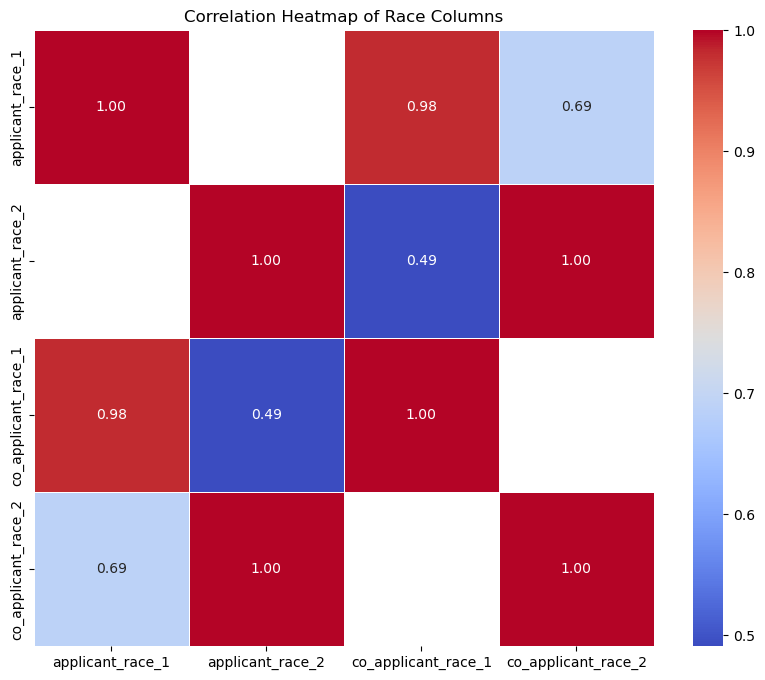

In [13]:
# Select the specified race columns
selected_columns = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
selected_df = filtered_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Race Columns')
plt.show()

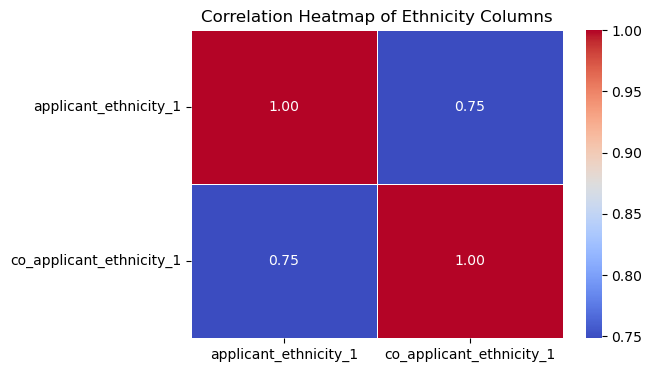

In [14]:
# Select the specified ethnicity columns
columns_of_ethnicity = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']
ethnicity_df =  filtered_df[columns_of_ethnicity]

# Calculate the correlation matrix
correlation_matrix_ethnicity = ethnicity_df.corr()

# Plot the heatmap for ethnicity columns
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_ethnicity, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Ethnicity Columns')
plt.show()

In [37]:
def generate_counts_table(counts, categories):
    df = pd.DataFrame(counts, columns=['1.0', '2.0'], index=categories)
    df.index.name = 'ethnicity_categories'
    return df

ethnicity_categories = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']
ethnicity_counts = [[149631, 19587], [72035, 8480]]

# Generate and display the Ethnicity Counts table
print('Ethnicity Counts:')
ethnicity_table = generate_counts_table(ethnicity_counts, ethnicity_categories)
print(ethnicity_table)

Ethnicity Counts:
                             1.0    2.0
ethnicity_categories                   
applicant_ethnicity_1     149631  19587
co_applicant_ethnicity_1   72035   8480


In [38]:
import pandas as pd

def generate_counts_table(counts, categories):
    df = pd.DataFrame(counts, columns=['2.0', '3.0'], index=categories)
    df.index.name = 'race_categories'
    return df

race_categories = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
race_counts = [[13484, 12671], [28, 165], [7119, 3545], [26, 34]]

# Generate and display the Race Counts table
print('Race Counts:')
race_table = generate_counts_table(race_counts, race_categories)
print(race_table)


Race Counts:
                       2.0    3.0
race_categories                  
applicant_race_1     13484  12671
applicant_race_2        28    165
co_applicant_race_1   7119   3545
co_applicant_race_2     26     34


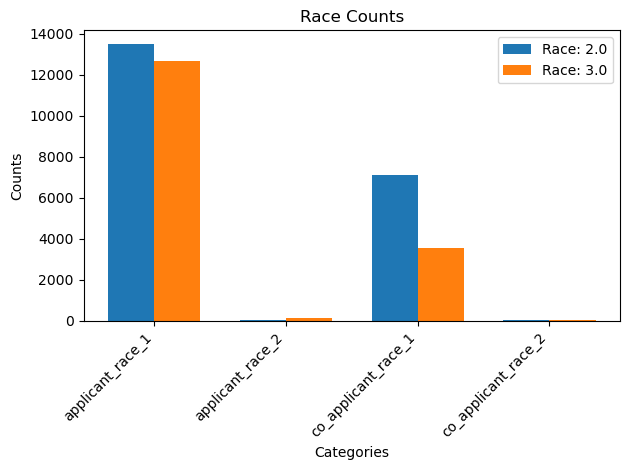

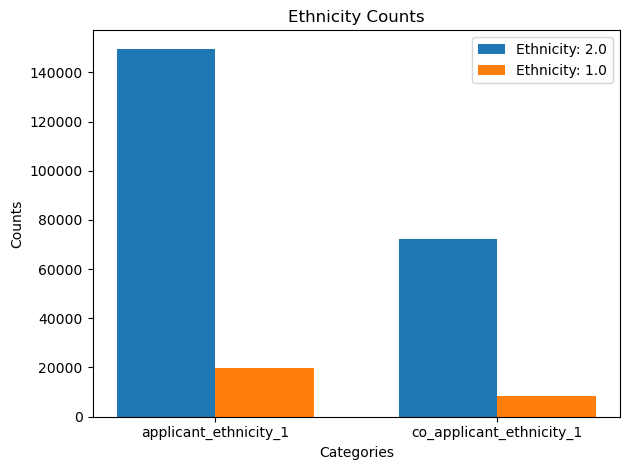

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Data
race_categories = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
race_counts = np.array(race_counts)

ethnicity_categories = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']
ethnicity_counts = np.array(ethnicity_counts)

# Plotting race counts
width = 0.35  # Width of the bars
x = np.arange(len(race_categories))  # the label locations

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, race_counts[:, 0], width, label='Race: 2.0')
rects2 = ax.bar(x + width/2, race_counts[:, 1], width, label='Race: 3.0')

ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Race Counts')
ax.set_xticks(np.arange(len(race_categories)))
ax.set_xticklabels(race_categories, rotation=45, ha='right')
ax.legend()

fig.tight_layout()

plt.show()

# Plotting ethnicity counts
fig, ax = plt.subplots()

rects1 = ax.bar(np.arange(len(ethnicity_categories)), ethnicity_counts[:, 0], width, label='Ethnicity: 2.0')
rects2 = ax.bar(np.arange(len(ethnicity_categories)) + width, ethnicity_counts[:, 1], width, label='Ethnicity: 1.0')

ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Ethnicity Counts')
ax.set_xticks(np.arange(len(ethnicity_categories)) + width / 2)
ax.set_xticklabels(ethnicity_categories)
ax.legend()

fig.tight_layout()

plt.show()

A lot in the category : 2 - Not Hispanic or Latino